This notebook describes the math used in the `get_pattern_frame_offset_adjustments()` function in `generate-fake-recording.py`. See the comments in that function for context.

{maxDeviation -> 0.5}
{start -> 0.5}
{end -> 1.5, start -> 0.5}
start ∈ Reals && start > 0 && end ∈ Reals && end > 0 && end > start && 
 
>   offsetIntoCycle ∈ Reals && offsetIntoCycle >= 0 && 
 
>   cumulativeOffsetIntoCycle ∈ Reals && cumulativeOffsetIntoCycle >= 0
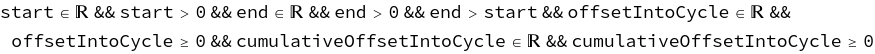

In [29]:
exampleMaxDeviation = {maxDeviation -> 0.5}
exampleWithoutEnd = {start -> 1-maxDeviation} /. exampleMaxDeviation
example = Join[{end -> 1+maxDeviation} /. exampleMaxDeviation, exampleWithoutEnd]
assumptions =
    Element[start, PositiveReals] && Element[end, PositiveReals] && end > start &&
    Element[offsetIntoCycle, NonNegativeReals] &&
    Element[cumulativeOffsetIntoCycle, NonNegativeReals]

end  offsetIntoCycle
-1 + (-----)                start
      start
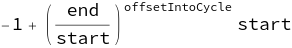

In [33]:
frameDurationAdjustment = (start (end/start)^offsetIntoCycle - 1)

-Graphics-
-0.5
0.5
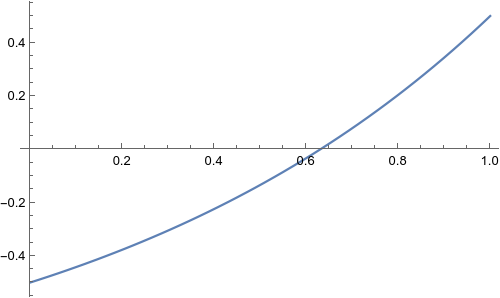

In [34]:
Plot[frameDurationAdjustment /. example, {offsetIntoCycle, 0, 1} /. example]
frameDurationAdjustment /. {offsetIntoCycle -> 0} /. example
frameDurationAdjustment /. {offsetIntoCycle -> 1} /. example

end  cumulativeOffsetIntoCycle
                             (-1 + (-----)                         ) start
                                    start
-cumulativeOffsetIntoCycle + ---------------------------------------------
                                                   end
                                              Log[-----]
                                                  start
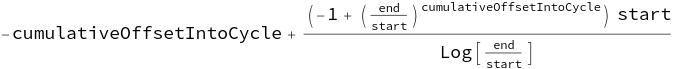

In [37]:
frameOffsetAdjustment = Integrate[frameDurationAdjustment, {offsetIntoCycle, 0, cumulativeOffsetIntoCycle}]

-Graphics-
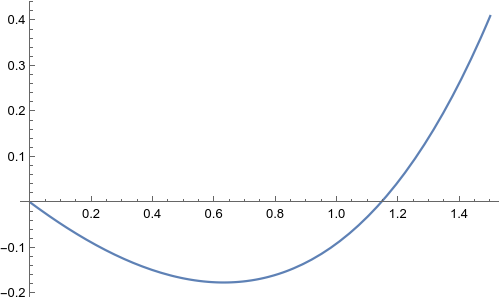

In [38]:
Plot[frameOffsetAdjustment /. example, {cumulativeOffsetIntoCycle, 0, 1.5} /. example]

end - start
-1 + -----------
          end
     Log[-----]
         start
-Graphics-
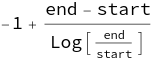
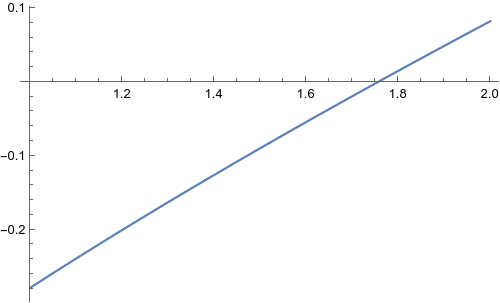

In [39]:
finalFrameOffsetAdjustment = FullSimplify[frameOffsetAdjustment /. {cumulativeOffsetIntoCycle -> 1}, assumptions]
Plot[finalFrameOffsetAdjustment /. {exampleWithoutEnd}, {end, 1, 2}]

Reduce::useq:                                                                                                 start
                                                                             ProductLog[C[1], -(------)]
                                                                                                 start
                                                                                                E                               start
The answer found by Reduce contains unsolved equation(s) {0 == start + Log[-(---------------------------)] + ProductLog[C[1], -(------)]}. A likely reason for this is that the solution set depends on branch cuts of Wolfram Language functions.
                                                                                        start                                    start
                                                                                                                                E

start != 0 && end != 0 && (end - start) start != 0 && 
 
                                        start
                       ProductLog[-1, -(------)]
                                         start
                                        E                             start
>   0 == start + Log[-(-------------------------)] + ProductLog[-1, -(------)] && 
                                 start                                 start
                                                                      E
 
                             start
>   end == -ProductLog[-1, -(------)]
                              start
                             E
end == 1.75643
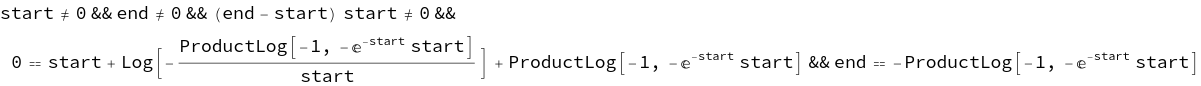

In [41]:
endSolution = Reduce[finalFrameOffsetAdjustment == 0, end] /. {C[1] -> -1}
FullSimplify[endSolution /. exampleWithoutEnd]